# SARIMA

In [49]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from arch import arch_model

In [12]:
ticker = ['TSLA']
start = "2020-01-01"
end = str(pd.to_datetime('now').date())

df = yf.download(ticker, start, end)
df = df.asfreq('B')
df.interpolate(method='linear', inplace=True)
df = df.asfreq('B')

[*********************100%***********************]  1 of 1 completed


In [15]:
df.tail(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-15,277.549988,278.980011,271.0,274.390015,274.390015,133422800.0


In [39]:
len(df)- 747

220

In [40]:
# TSLA = df[['Adj Close']].iloc[760:]
TSLA = df[['Adj Close']].iloc[747:]
# TSLA = df[['Adj Close']]

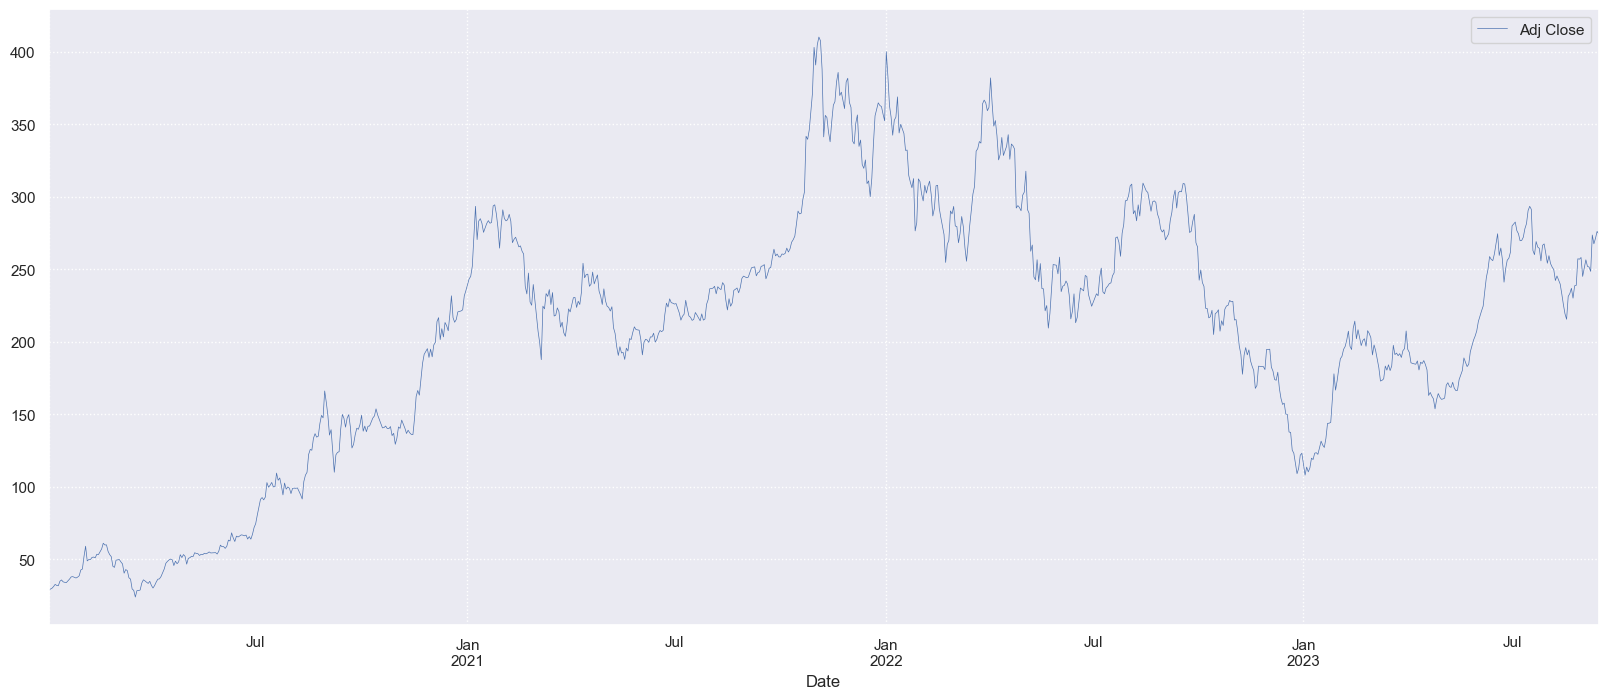

In [20]:
ax = df['Adj Close'].plot(figsize=(20,8),lw=0.5, color='b', legend=True)
ax.grid(True, ls=':')

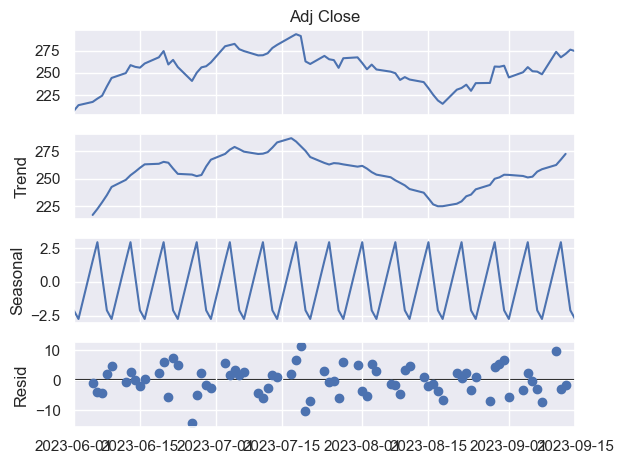

In [28]:
seasonal_decompose(TSLA['Adj Close'].loc['2023-06-01':], model='add').plot();

In [ ]:
auto_arima(TSLA['Adj Close'], seasonal=False)

In [41]:
auto_arima(TSLA['Adj Close'], seasonal=True, m=7)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True, with_intercept=False)

In [42]:
len(TSLA)

220

In [43]:
train = TSLA.iloc[:200]
test = TSLA.iloc[200:]

start = len(train)
end = len(train) + len(test) - 1

In [25]:
# model = ARIMA(TSLA['Adj Close'], order=(2,1,2))
# results = model.fit()

# predictions = results.predict(start=start, end=end).rename('ARIMA (2,1,2) Predictions')

# forecast = results.predict(len(TSLA), len(TSLA)+20).rename('ARIMA (2,1,2) FORECAST')

In [44]:
seasonal_model = SARIMAX(TSLA['Adj Close'], order=(0,1,0), seasonal_order=(1,0,1,7),
                        enforce_invertibility=False, enforce_stationarity=True, trend='c')

seasonal_results = seasonal_model.fit()

seasonal_predictions = seasonal_results.predict(start=start, end=end).rename('Predictions')

seasonal_forecast = seasonal_results.predict(len(TSLA), len(TSLA)+20).rename('Forecasts')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.34536D+00    |proj g|=  1.26843D-02

At iterate    5    f=  3.33468D+00    |proj g|=  5.99559D-03

At iterate   10    f=  3.33446D+00    |proj g|=  1.75944D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     22      1     0     0   8.168D-06   3.334D+00
  F =   3.3344282794573608     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


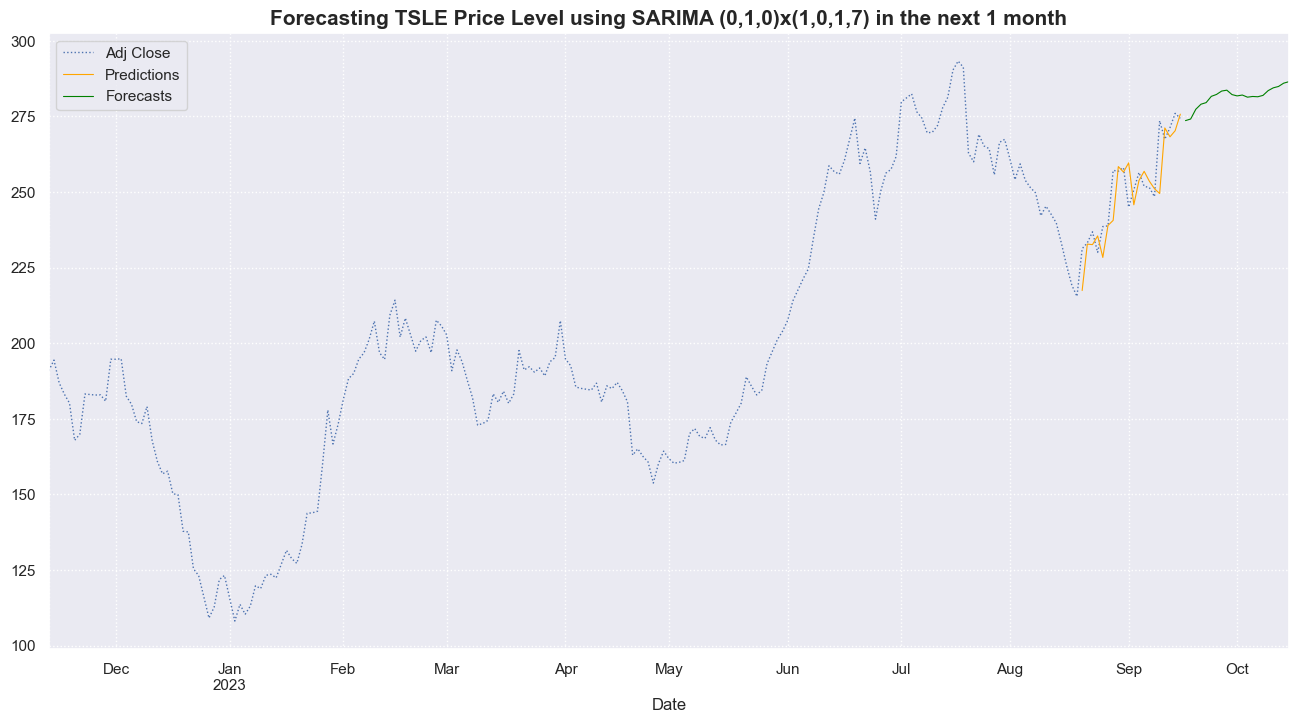

In [47]:
ax = TSLA['Adj Close'].plot(legend=True, figsize=(16,8), lw=1, color='b', ls=':')
# ax = TSLA['Adj Close'].loc["2023-05-01":].plot(legend=True, figsize=(16,8), lw=1, color='b', ls=':')
# predictions.plot(legend=True, lw=0.6)
# forecast.plot(legend=True, lw=0.8)
seasonal_predictions.plot(legend=True, lw=0.8, color='orange')
seasonal_forecast.plot(legend=True, color='green', lw=0.8)
ax.grid(True, ls=':')
ax.set_title("Forecasting TSLE Price Level using SARIMA (0,1,0)x(1,0,1,7) in the next 1 month", fontdict={'fontsize': 15, 'fontweight': 'heavy'});

# EMWA 

In [ ]:
TSLA['6-Month SMA'] = TSLA['Adj Close'].rolling(window=6).mean()
TSLA['12-Month SMA'] = TSLA['Adj Close'].rolling(window=12).mean()

TSLA['6-Month EWMA'] = TSLA['Adj Close'].ewm(span=6).mean()
TSLA['12-Month EWMA'] = TSLA['Adj Close'].ewm(span=12).mean()

In [ ]:
TSLA.head(1)

In [ ]:
TSLA.columns

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 6
alpha = 2/(span+1)

model = SimpleExpSmoothing(TSLA['Adj Close'])
results = model.fit(smoothing_level=alpha, optimized=False)

TSLA['6-Month SES'] = results.fittedvalues.shift(-1)

In [ ]:
ax = TSLA[['Adj Close', '6-Month SMA', '6-Month EWMA', '6-Month SES']].plot(figsize=(20,8), lw=0.8)
ax.grid(True, ls=':')
ax.set_title("Moving Averages", fontdict={'fontsize': 15, 'fontweight': 'heavy'});

In [ ]:
TSLA['Returns'] = TSLA['Adj Close'].pct_change().dropna()
lambda_ = 0.94

In [ ]:
TSLA['1-Month SMA'] = TSLA['Returns'].rolling(window=20).mean()

TSLA['6-Month EWMA'] = TSLA['Returns'].ewm(span=120).mean()
TSLA['1-Month EWMA'] = TSLA['Returns'].ewm(span=20).mean()

In [ ]:
ax = TSLA[['Returns', '1-Month EWMA', '1-Month SMA']]["2023-06-01":].plot(figsize=(20,8), lw=0.8)
ax.grid(True, ls=':')
ax.set_title("Moving Averages", fontdict={'fontsize': 15, 'fontweight': 'heavy'});

In [ ]:
TSLA['EWMA 1-Month Variance'] = TSLA['Returns'].ewm(span=20).var()
TSLA['EWMA 1-Month Volatility'] = np.sqrt(TSLA['EWMA 1-Month Variance']) *100

TSLA['EWMA Variance Forecast'] = lambda_*TSLA['EWMA 1-Month Variance'].shift(1) + (1-lambda_)*(TSLA['Returns'].shift(1))**2
TSLA['EWMA Volatility Forecast'] = np.sqrt(TSLA['EWMA Variance Forecast']) *100

In [ ]:
ax = TSLA[['EWMA 1-Month Volatility', 'EWMA Volatility Forecast']].plot(figsize=(20,8), lw=0.8, legend=True)
ax.grid(True, ls=':')
ax.set_title("Forecasted Future Volatility", fontdict={'fontsize': 15, 'fontweight': 'heavy'})

In [ ]:
TSLA.tail(2)

In [ ]:
np.sqrt(lambda_*0.001724 + (1-lambda_)*(0.100925)**2) * 100

In [ ]:
TSLA['EWMA Volatility Forecast'].plot(figsize=(20,8), lw=0.8, legend=True)

# ARCH(q)

Conditional Variance: $var(y_t | y_{t-1}) = \sigma_t^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2$ 

where $\epsilon_{t-1}$ is the residuals from the previous period. 


ARCH contains the $\mu$ equation and $\sigma^2$ equation:  
i.e. $r_t = \mu_t + \epsilon_t$ ; estimate the residuals

where $\mu_t$ is a function of past values and past errors and $\epsilon_t$ is the residual values left after estimating the coefficients.

$\mu_t = c_0 + \phi_1 \mu_{t-1}$

Observe PACF of $r_t$ & $r_t^2$

In [51]:
# TSLA['Returns'] = TSLA['Adj Close'].pct_change().dropna()
# TSLA['Returns'] = TSLA['Returns']*100
# TSLA['Squared Returns'] = TSLA['Returns'].mul(TSLA['Returns'])

In [109]:
# Need more data to be significant
TSLA = df[['Adj Close']]
TSLA['Returns'] = TSLA['Adj Close'].pct_change().dropna()
TSLA['Returns'] = TSLA['Returns']*100
TSLA['Squared Returns'] = TSLA['Returns'].mul(TSLA['Returns'])

/var/folders/ry/l6l2rczs6fv74vjj8km57tmm0000gn/T/ipykernel_11839/2457738083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TSLA['Returns'] = TSLA['Adj Close'].pct_change().dropna()
/var/folders/ry/l6l2rczs6fv74vjj8km57tmm0000gn/T/ipykernel_11839/2457738083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TSLA['Returns'] = TSLA['Returns']*100
/var/folders/ry/l6l2rczs6fv74vjj8km57tmm0000gn/T/ipykernel_11839/2457738083.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [81]:
len(TSLA)

967

In [108]:
# train = TSLA.iloc[:940]
# test = TSLA.iloc[940:]

# start = len(train)
# end = len(train) + len(test) - 1

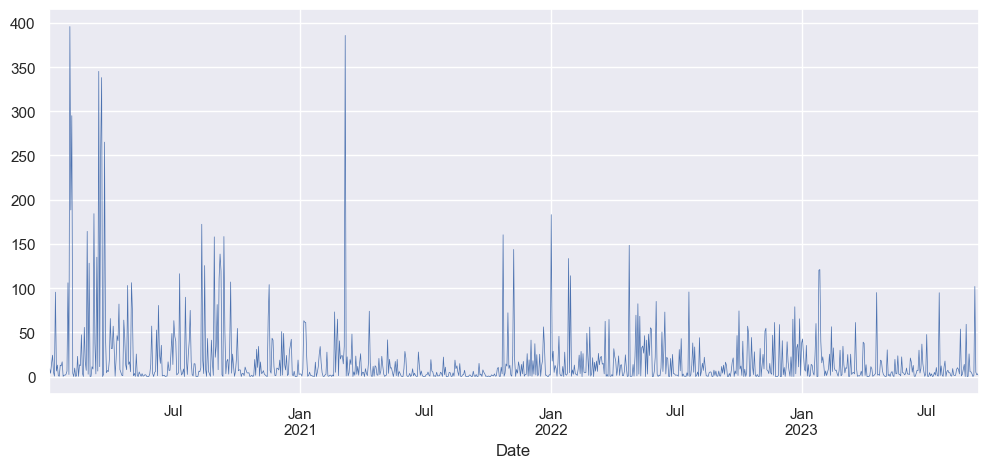

In [63]:
TSLA['Squared Returns'].plot(figsize=(12,5), lw=0.5);

In [ ]:
TSLA[['Returns', 'Squared Returns']]["2023-01-01":].plot(figsize=(20,5))

In [222]:
lambda_ = 0.94

In [223]:
TSLA['Daily Volatility'] = TSLA['Returns'].rolling(window=5).std()
TSLA['EWMA Daily Volatility'] = TSLA['Returns'].ewm(span=1 / (1 - lambda_), adjust=False).std()

/var/folders/ry/l6l2rczs6fv74vjj8km57tmm0000gn/T/ipykernel_11839/2798023169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TSLA['Daily Volatility'] = TSLA['Returns'].rolling(window=5).std()
/var/folders/ry/l6l2rczs6fv74vjj8km57tmm0000gn/T/ipykernel_11839/2798023169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TSLA['EWMA Daily Volatility'] = TSLA['Returns'].ewm(span=1 / (1 - lambda_), adjust=False).std()


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(TSLA.Returns[1:], lags=40, alpha=0.05, zero=False, method=('ols'), ax=ax);

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(TSLA['Squared Returns'][1:], lags=40, alpha=0.05, zero=False, method=('ols'), ax=ax);

Iteration:      5,   Func. Count:     26,   Neg. LLF: 2749.50396396413
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2749.50396396413
            Iterations: 5
            Function evaluations: 26
            Gradient evaluations: 5


<Axes: xlabel='Date'>

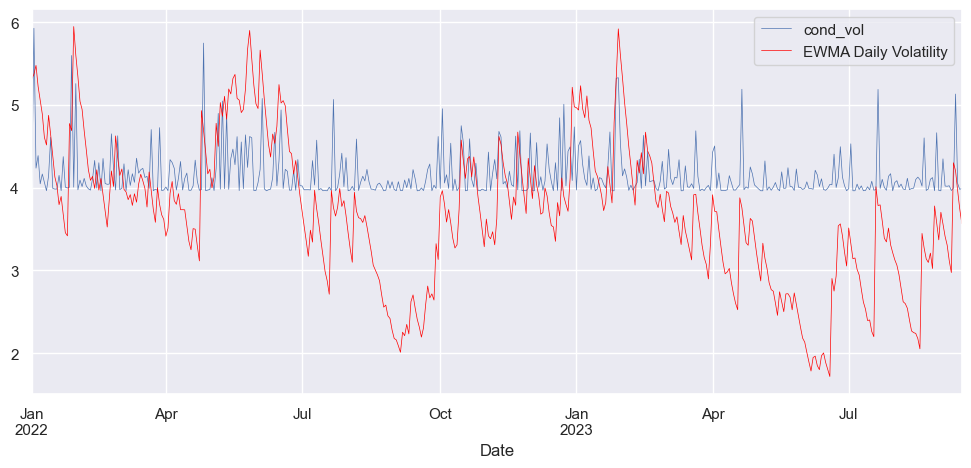

In [227]:
model_arch_1 = arch_model(TSLA['Returns'][1:], mean='Constant', vol='ARCH', p=1)
results_arch_1 = model_arch_1.fit(update_freq=5)

results_arch_1.conditional_volatility["2022-01-01":].plot(figsize=(12,5), lw=0.5, legend=True)
TSLA['EWMA Daily Volatility']["2022-01-01":].plot(legend=True, lw=0.5, color='red')
# TSLA['Daily Volatility']["2022-01-01":].plot(legend=True, lw=0.3)

In [199]:
model_arch_3 = arch_model(TSLA['Returns'][1:], mean='Constant', vol='ARCH', p=3)
results_arch_3 = model_arch_3.fit(update_freq=5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 2729.119170275464
Iteration:     10,   Func. Count:     69,   Neg. LLF: 2717.3927185411408
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2717.3927185411408
            Iterations: 11
            Function evaluations: 74
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2717.39
Distribution:                  Normal   AIC:                           5444.79
Method:            Maximum Likelihood   BIC:                           5469.15
                                        No. Observations:                  966
Date:                Sat, Sep 16 2023   Df Residuals:                      965
Time:                        19:22:48   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.3981      0.129      3.083  2.051e-03 [  0.145,  0.651]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         11.0139      1.161      9.487  2.377e-21    [  8.739, 13.289]
alpha[1]       0.0690  3.702e-02      1.863  6.252e-02 [-3.604e-03,  0.142]
alpha[2]       0.1955  5.834e-02      3.352  8.030e-04  [8.119e-02,  0.310]
alpha[3]       0.1089  3.873e-02      2.813  4.914e-03  [3.302e-02,  0.185]
===========================================================================

Covariance estimator: robust
"""

In [152]:
TSLA.tail(5)

,Adj Close,Returns,Squared Returns,Daily Volatility
Date,,,,
2023-09-11,273.579987,10.092550,101.859564,4.864159
2023-09-12,267.480011,-2.229686,4.971501,5.171793
2023-09-13,271.299988,1.428135,2.039571,4.942972
2023-09-14,276.040009,1.747151,3.052537,4.846009
2023-09-15,274.390015,-0.597737,0.357290,4.756049


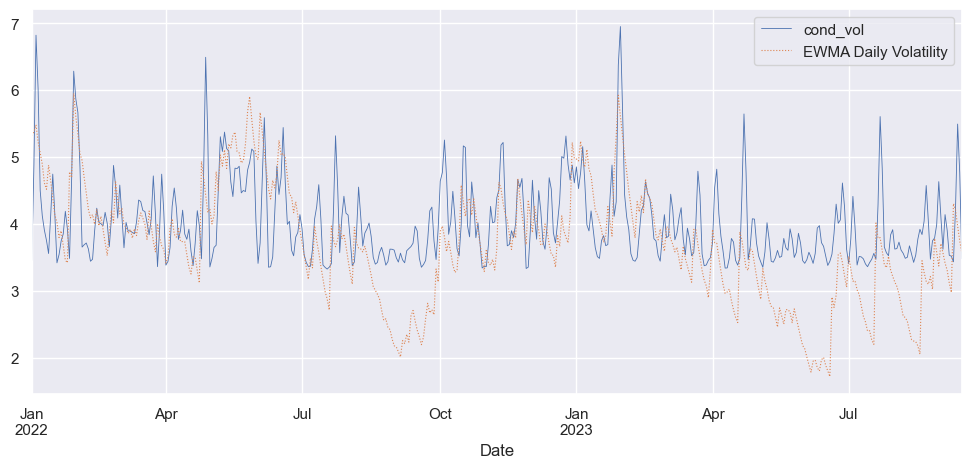

In [240]:
# results_arch_3.conditional_volatility["2023-01-01":].plot(figsize=(12,5), lw=0.5, legend=True)
# TSLA['Daily Volatility']["2023-01-01":].plot(legend=True, lw=0.3);

results_arch_3.conditional_volatility["2022-01-01":].plot(figsize=(12,5), lw=0.6, legend=True)
# TSLA['Daily Volatility']["2022-01-01":].plot(legend=True, lw=0.3);
TSLA['EWMA Daily Volatility']["2022-01-01":].plot(legend=True, lw=0.8, ls=":");

/usr/local/lib/python3.11/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


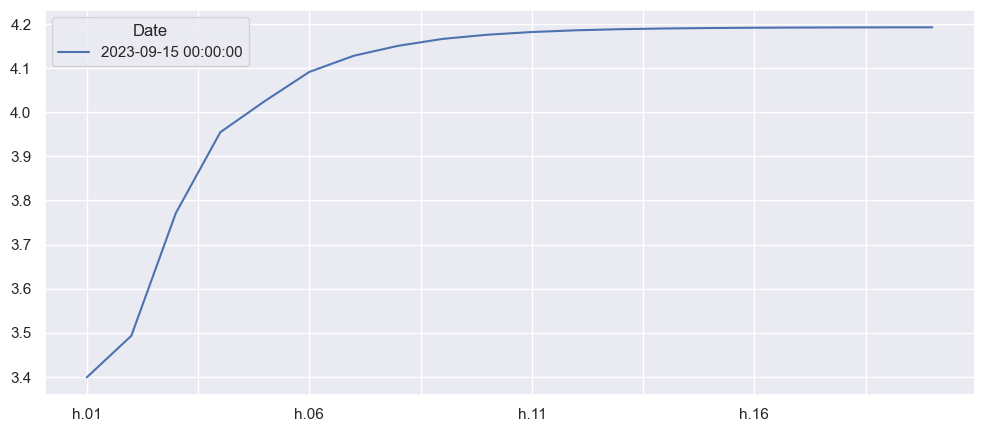

In [167]:
# Make 5-period ahead forecast
forecasts_arch_3 = results_arch_3.forecast(horizon = 20)

# Print the forecast variance
(np.sqrt(forecasts_arch_3.variance[-1:]).T).plot(figsize=(12,5));

In [ ]:
model_arch_2 = arch_model(TSLA['Returns'][1:], mean='Constant', vol='ARCH', p=2)
results_arch_2 = model_arch_2.fit(update_freq=5)
results_arch_2.summary()

## GARCH(1,1): $\sigma_t^2 = \omega + \alpha \epsilon_{t-1}^2$ + $\beta \sigma_{t-1}^2$  

where  

$\omega = \gamma V_L$ where $V_L$ is the long run variance term  
$\epsilon_{t-1}^2$ is the random shock term  
$\sigma_{t-1}^2$ is the volatility clustering term

- an ARCH order and a GARCH order
- ARCH order p => past $\epsilon_t^2$
- GARCH order q => past $\sigma_t^2$

conditional variance + previous period conditional variance

$\sigma_t^2 = \omega_0 + \alpha_1 \epsilon_{t-1}^2$ + $\beta_1 \sigma_{t-1}^2$

$\sigma_{t-1}^2$ representing volatility clustering ("Benchmark")

$\sigma_n^2 = \omega + \alpha \epsilon_{n-1}^2$ + $\beta \sigma_{n-1}^2$  
$\sigma_n^2 = \gamma V_L + \alpha \epsilon_{n-1}^2$ + $\beta \sigma_{n-1}^2$ 

and constraints: $\alpha + \beta + \gamma = 1 $ and $\omega = \gamma*V_L$ 

$E[\sigma_{n+t}^2] = V_L + (\alpha+\beta)^t (\sigma_n^2 - V_L)$

In [178]:
len(TSLA)

967

In [190]:
model_garch_1_1 = arch_model(TSLA['Returns'][1:], mean='Constant', vol='GARCH', p=1, q=1)
results_garch_1_1 = model_garch_1_1.fit(update_freq=5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 2704.6140547488535
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2704.6136128116736
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2704.61
Distribution:                  Normal   AIC:                           5417.23
Method:            Maximum Likelihood   BIC:                           5436.72
                                        No. Observations:                  966
Date:                Sat, Sep 16 2023   Df Residuals:                      965
Time:                        19:18:06   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3189      0.120      2.660  7.817e-03 [8.391e-02,  0.554]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3403      0.292      1.165      0.244   [ -0.232,  0.913]
alpha[1]       0.0590  2.139e-02      2.760  5.774e-03 [1.712e-02,  0.101]
beta[1]        0.9211  3.166e-02     29.091 4.626e-186   [  0.859,  0.983]
==========================================================================

Covariance estimator: robust
"""

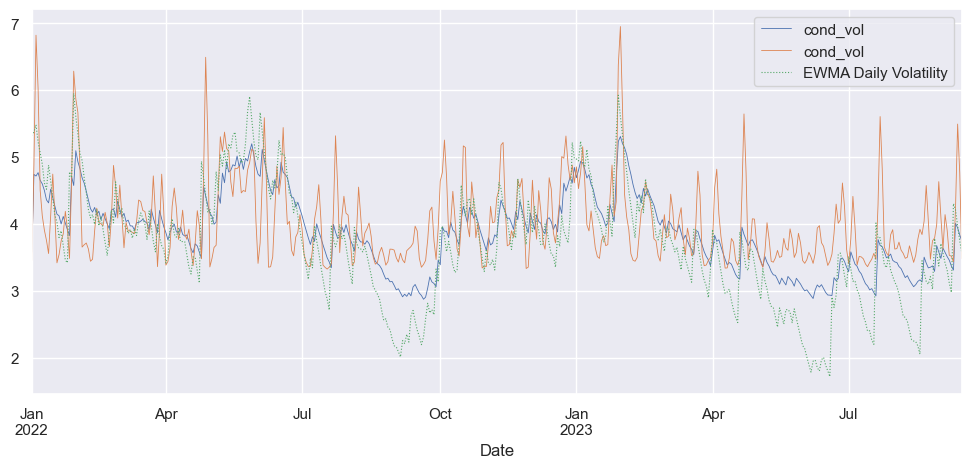

In [244]:
# results_garch_1_1.conditional_volatility["2023-01-01":].plot(figsize=(12,5), lw=0.5, legend=True)
# TSLA['Daily Volatility']["2023-01-01":].plot(legend=True, lw=0.3);

results_garch_1_1.conditional_volatility["2022-01-01":].plot(figsize=(12,5), lw=0.6, legend=True)
results_arch_3.conditional_volatility["2022-01-01":].plot(figsize=(12,5), lw=0.6, legend=True)
# TSLA['Daily Volatility']["2022-01-01":].plot(legend=True, lw=0.7, ls="dotted");
TSLA['EWMA Daily Volatility']["2022-01-01":].plot(legend=True, lw=0.8, ls=':');

In [246]:
np.sqrt(forecasts_garch_1_1.variance[-1:])

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,h.11,h.12,h.13,h.14,h.15,h.16,h.17,h.18,h.19,h.20
Date,,,,,,,,,,,,,,,,,,,,
2023-09-15,3.644651,3.655098,3.665309,3.675289,3.685045,3.694582,3.703905,3.713021,3.721933,3.730648,3.73917,3.747503,3.755653,3.763624,3.77142,3.779046,3.786505,3.793801,3.800939,3.807922


/usr/local/lib/python3.11/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


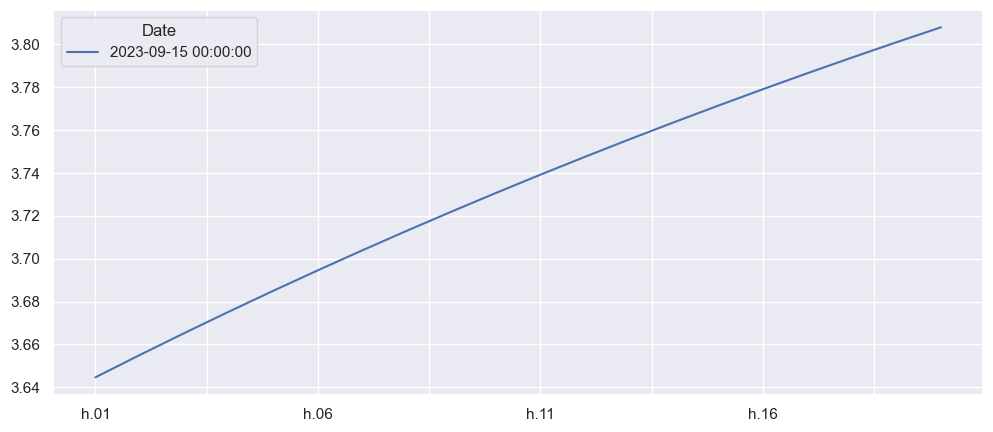

In [196]:
# Make 5-period ahead forecast
forecasts_garch_1_1 = results_garch_1_1.forecast(horizon = 20)

# Print the forecast variance
(np.sqrt(forecasts_garch_1_1.variance[-1:]).T).plot(figsize=(12,5));

In [67]:
omega = 0.3403 #not significant
alpha = 0.0590
beta = 0.9211

gamma = 1 - alpha - beta
V_L = omega/gamma

In [69]:
V_L

17.100502512562787